In [95]:
%matplotlib inline
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
# import catboost
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')  # we are rebels and we ignore warnings for now


In [96]:
train = pd.read_csv(r'https://raw.githubusercontent.com/mrdbourke/your-first-kaggle-submission/master/data/train.csv', index_col=0)
test = pd.read_csv(r'https://raw.githubusercontent.com/mrdbourke/your-first-kaggle-submission/master/data/test.csv', index_col=0)
gender_submission = pd.read_csv(r'https://raw.githubusercontent.com/mrdbourke/your-first-kaggle-submission/master/data/gender_submission.csv', index_col=0)
"""
plcass = just the class
embarked = port of embarcation
sibsp = number of siblings/spoused aboard the titanic
parch = number of parents/children aboard
"""

'\nplcass = just the class\nembarked = port of embarcation\nsibsp = number of siblings/spoused aboard the titanic\nparch = number of parents/children aboard\n'

In [97]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [99]:
gender_submission.head(3)

,Survived
PassengerId,
892,0
893,1
894,0


In [100]:
print(train.shape)
print(test.shape)  # we have to predict wether they survived or not. missing column here.

(891, 11)
(418, 10)


In [101]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
# let's check where are the holes in our data. first thing to do!
train.isnull().sum()
# train.loc[train.Age.isna()]    # selecting rows where age has no value reported. 

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [103]:
# create 2 dataframes: continuous/discrete values. 
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [104]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# Srvived feature

0    549
1    342
Name: Survived, dtype: int64


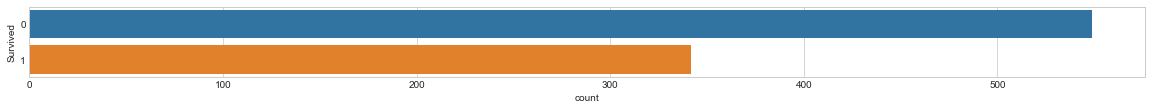

In [105]:
fig = plt.figure(figsize=(20,1.3))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

In [106]:
df_bin['Survived'] = train.Survived
df_con['Survived'] = train.Survived

# passenger Class feature

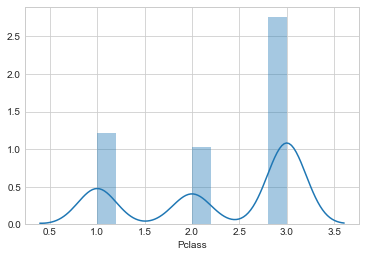

In [107]:
sns.distplot(train.Pclass)

In [108]:
df_bin['Pclass'] = train.Pclass
df_con['Pclass'] = train.Pclass

# feature: name

In [109]:
train.Name.value_counts()[:10]

Peters, Miss. Katie                      1
Weir, Col. John                          1
Rice, Master. Eugene                     1
Baclini, Mrs. Solomon (Latifa Qurban)    1
Devaney, Miss. Margaret Delia            1
Panula, Master. Urho Abraham             1
Jardin, Mr. Jose Neto                    1
Bishop, Mr. Dickinson H                  1
Frost, Mr. Anthony Wood "Archie"         1
Dean, Mr. Bertram Frank                  1
Name: Name, dtype: int64

# feature Sex

male      577
female    314
Name: Sex, dtype: int64


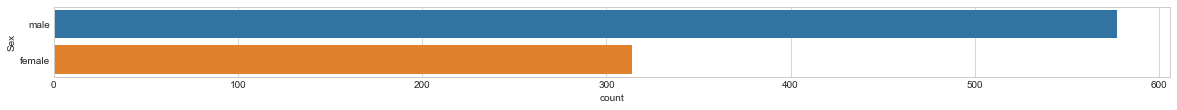

In [110]:
fig = plt.figure(figsize=(20,1.3))
sns.countplot(y='Sex', data=train)
print(train.Sex.value_counts())
df_bin['Sex'] = train.Sex
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)
df_con['Sex'] = train['Sex']

In [111]:
df_bin.head()

,Survived,Pclass,Sex
PassengerId,,,
1,0,3,0
2,1,1,1
3,1,3,1
4,1,1,1
5,0,3,0


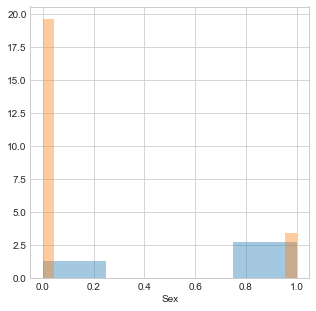

In [168]:
# since they're both binary.. how do they look.. together.. sex and survived?
# i see problems with this plot... why? D:
fig = plt.figure(figsize=(5,5))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'], 
             # kde_kws={'label': "Survived"},
             kde=False,
             hist=True,
             hist_kws = {'stacked': True, 'density': True, 'rwidth' : None}
             )
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'], 
            #  kde_kws={'label': "Did not survive"},
             kde=False,
             hist=True,
             hist_kws = {'stacked': True, 'density': True, 'rwidth' :None}
             )

# age

In [113]:
# many missing values.  how should we handle this? 
# we'll see later

# Siblings and Spoused

In [114]:
train.SibSp.value_counts()
# so, not a lot of couples were on titanic!

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [155]:
def plot_count_distribution(data, bin_df, label_column, target_column, figsize=(20,5), use_bin_df=False):
    '''
    funtion to plot counts and distributions of a label variable
    and a target variable side by side
    '''
    if use_bin_df:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=target_column, data=bin_df)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column],
                    kde_kws={'label':'Survived'})
        sns.distplot(data.loc[data[label_column]==0][target_column],
                    kde_kws={'label':'not survived'})
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=target_column, data=bin_df)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column],
                    #kde_kws={'label':'Survived'},
                     kde=False,
                     hist=True
                    )
        sns.distplot(data.loc[data[label_column]==0][target_column],
                    #kde_kws={'label':'not survived'},
                     kde=False,
                     hist=True
                    )
        

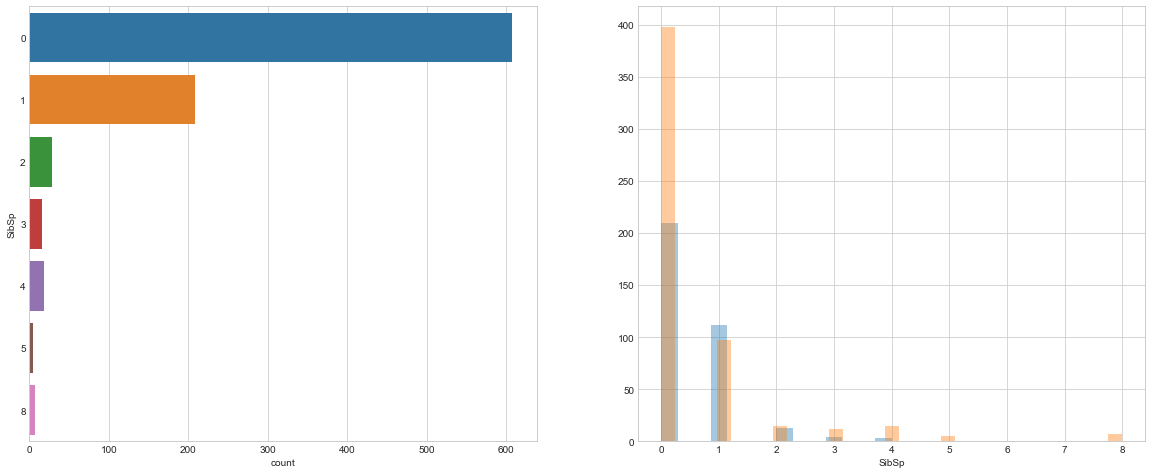

In [175]:
# plottiamo la distribuzione di quelli che si sono salvati vs quelli che non si sono salvati, rispetto a una certa variabile target
# cui siamo interessati
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']
plot_count_distribution(train, 
                        bin_df=df_bin,
                        label_column='Survived',
                        target_column='SibSp',
                        figsize=(20,8))

# parents / children

In [157]:
train.Parch.value_counts()
# similar to the previous feature

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

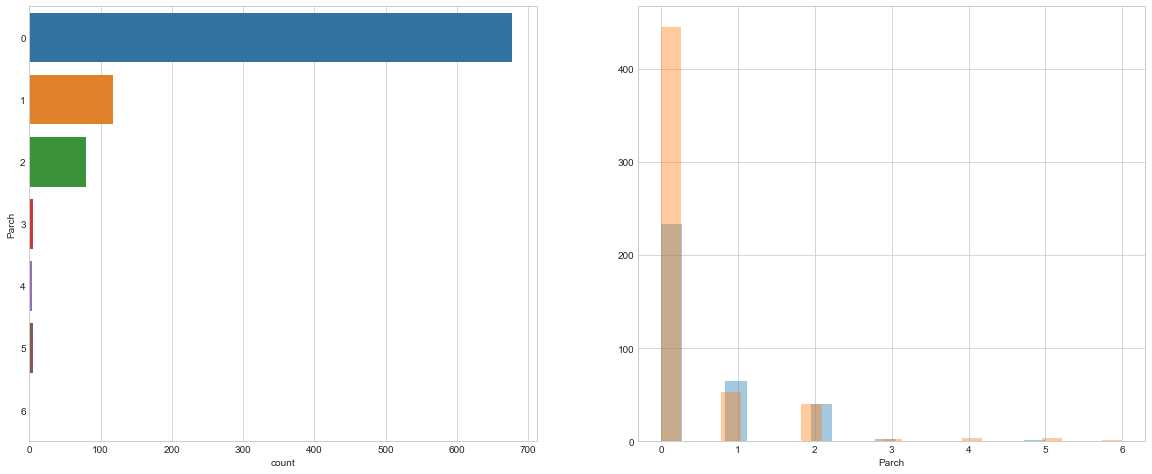

In [169]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']
plot_count_distribution(train, 
                        bin_df=df_bin,
                        label_column='Survived',
                        target_column='Parch',
                        figsize=(20,8))

In [170]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
PassengerId,,,,,
1,0,3,male,1,0
2,1,1,female,1,0
3,1,3,female,0,0
4,1,1,female,1,0
5,0,3,male,0,0


# feature: Ticket

In [171]:
train.Ticket.value_counts()
# we are not going to use the ticket feature, for now

CA. 2343    7
1601        7
347082      7
3101295     6
CA 2144     6
           ..
2223        1
347061      1
3474        1
349223      1
695         1
Name: Ticket, Length: 681, dtype: int64

# Feature: Fare

In [178]:
df_con['Fare'] = train.Fare
df_bin['Fare'] = pd.cut(train['Fare'], bins=5)
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,0,1,0,"(-0.512, 102.466]"
2,1,1,1,1,0,"(-0.512, 102.466]"
3,1,3,1,0,0,"(-0.512, 102.466]"
4,1,1,1,1,0,"(-0.512, 102.466]"
5,0,3,0,0,0,"(-0.512, 102.466]"


In [179]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,male,1,0,7.2500
2,1,1,female,1,0,71.2833
3,1,3,female,0,0,7.9250
4,1,1,female,1,0,53.1000
5,0,3,male,0,0,8.0500


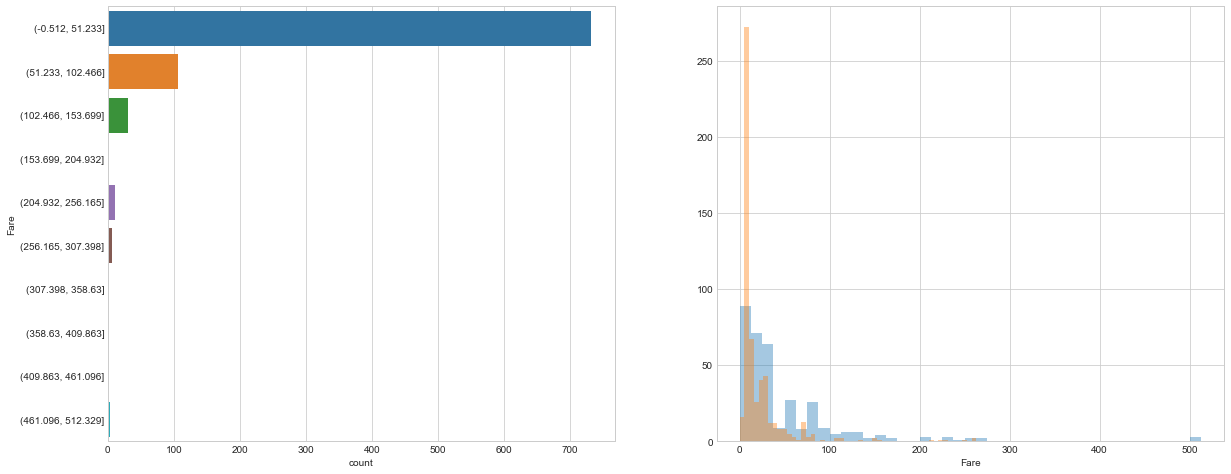

In [182]:
# no missing values
df_bin['Fare'] = pd.cut(train['Fare'], bins=10)
df_con['Fare'] = train['Fare']
plot_count_distribution(train, 
                        bin_df=df_bin,
                        label_column='Survived',
                        target_column='Fare',
                        figsize=(20,8))